<a href="https://colab.research.google.com/github/nastasiacetkovic/PPPO-IT38-2021/blob/main/Lego_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principi prezentacije i prepoznavanja oblika 2024/2025**
### **Tema projekta: GAN, Nastasia Ćetković IT38/2021**


###### Profesor: Marko Arsenović
###### Asistent: Tamara Žuvela





##**Sadržaj**

Uvod

Teorijski deo

Odabir i opis korišćenih tehnologija


Analiza dataseta


Preuzimanje i raspakivanje podataka


Pregled strukture foldera i fajlova


Vizualizacija slika


Priprema slika za GAN model


Kreiranje GAN arhitekture – DCGAN


Treniranje GAN modela


Evaluacija rezultata treniranja


Zaključak


Literatura


#Uvod

U savremenom svetu veštačke inteligencije, generativni modeli postaju sve važniji alat u oblasti obrade slika, umetnosti, dizajna i kreativne industrije. Među njima, Generative Adversarial Networks (GANs) predstavljaju jednu od najuzbudljivijih i najefikasnijih metoda za generisanje novih, realističnih podataka – najčešće slika – na osnovu naučenih obrazaca.


Cilj ovog rada je implementacija GAN modela u Pythonu, korišćenjem PyTorch biblioteke, sa primenom na stvaranje slika LEGO minifigura. Istražuje se koliko dobro GAN može da rekonstruiše i generiše slične slike na osnovu dostupnog skupa podataka, koji u ovom slučaju sadrži nekoliko stotina fotografija različitih LEGO figura.


Kroz praktičan deo rada prikazani su svi koraci implementacije – od učitavanja i obrade podataka, preko kreiranja Generatora i Discriminatora, pa do treniranja modela i evaluacije rezultata. Dodatno, vizuelno su predstavljene generisane slike, upoređene sa originalima, uz analizu kvaliteta i mogućnosti daljeg unapređenja modela.


Ovaj projekat ima za cilj da na jednostavan i razumljiv način demonstrira kako funkcioniše jedan savremeni generativni model, koji istovremeno uključuje i znanje iz oblasti neuronskih mreža, programiranja, obrade slika i analize performansi modela.

#Teorijski deo: Generative Adversarial Networks (GAN)

**Generative Adversarial Networks (GANs)** predstavljaju savremeni pristup u oblasti dubokog učenja, čiji je osnovni cilj generisanje novih podataka koji verno imitiraju karakteristike stvarnog skupa podataka. Ovu arhitekturu su 2014. godine predstavili Ian Goodfellow i saradnici, a zahvaljujući svojoj fleksibilnosti i sposobnosti da uče kompleksne distribucije podataka, GAN modeli su brzo postali jedno od najzastupljenijih rešenja u domenu generativnog modelovanja, sa primenom u računarskoj viziji, medicinskim simulacijama, animaciji, restauraciji slika i mnogim drugim oblastima.



GAN se sastoji od dva međusobno suprotstavljena modela: **generatora i diskriminatora.**



Generator ima zadatak da na osnovu ulaznog latentnog vektora (slučajnog šuma) generiše podatke (npr. slike) koje što više liče na stvarne.
Diskriminator, s druge strane, pokušava da razlikuje prave podatke (iz stvarnog dataset-a) od lažnih (onih koje je generisao model).
Ova dva modela funkcionišu u takozvanom adversarialnom procesu – generator teži da „prevari“ diskriminator tako što proizvodi što realističnije podatke, dok diskriminator konstantno unapređuje svoju sposobnost da razlikuje prave od generisanih primera. Ova interakcija se odvija kroz iterativni proces obuke u kojem se istovremeno optimizuju oba modela pomoću odgovarajućih funkcija gubitka (loss funkcija).



Cilj treninga je da se postigne **Nashova ravnoteža** – tačka u kojoj diskriminator više ne može sa sigurnošću da razlikuje stvarne od generisanih podataka, odnosno gde su oba modela optimalno istrenirana za svoje zadatke.



Iako GAN-ovi predstavljaju veoma moćan alat, njihov trening je često nestabilan i osetljiv na hiperparametre, što zahteva pažljivo balansiranje arhitektura i postupaka regularizacije. Pored toga, za stabilan rad GAN modela neophodna je dovoljna količina kvalitetnih i reprezentativnih podataka.

#Odabir i opis korišćenih tehnologija


Za realizaciju projekta generisanja slika LEGO figura korišćen je skup savremenih alata i biblioteka koji omogućavaju efikasnu implementaciju neuronskih mreža i rad sa slikovnim podacima. Glavni cilj bio je razviti i trenirati Generative Adversarial Network (GAN) model koji može da generiše nove slike slične onima iz originalnog skupa podataka.


`Python`
Python je odabran kao glavni programski jezik zbog svoje čitljivosti, fleksibilnosti i bogatog ekosistema biblioteka za mašinsko učenje i obradu podataka.


`PyTorch`
PyTorch predstavlja jednu od najpopularnijih biblioteka za duboko učenje, razvijenu od strane Facebook AI Research. Korišćena je za kreiranje i treniranje GAN modela zahvaljujući intuitivnoj sintaksi, podršci za GPU ubrzanje i mogućnosti dinamičkog kreiranja computational grapha.


`Google Colab`
Google Colaboratory je cloud platforma koja omogućava pokretanje Python koda u okruženju koje ima pristup GPU-u, što je ključno za ubrzanje treniranja modela. Prednost Colab-a je i to što ne zahteva lokalnu instalaciju softvera, već sve funkcioniše direktno iz web browser-a.


`Matplotlib i NumPy`
Matplotlib je korišćen za vizuelizaciju rezultata, odnosno za prikaz gubitaka tokom epoha i generisanih slika.
NumPy je korišćen za obradu numeričkih podataka i rad sa nizovima u toku postprocesiranja rezultata modela.


`TorchVision`
TorchVision je PyTorch biblioteka koja obezbeđuje alate za učitavanje i transformaciju slika. U ovom projektu korišćena je za transformaciju dataset-a i pripremu slika za trening modela (resize, normalization, konverzija u tenzore).


`Dataset`
Dataset sadrži ukupno 494 slike LEGO minifigura u JPG formatu. Slike prikazuju različite figure na svetloj pozadini, ali su mahom niskog kvaliteta – često mutne, sa slabim kontrastom i bez jasno definisanih ivica.

# Analiza dataseta

Za ovaj projekat koristi se skup podataka koji sadrži slike LEGO figurica, koji je preuzet sa sledećeg linka:

`LEGO_GAN.zip`


Fajl `LEGO_GAN.zip` u sebi sadrži više foldera,pri čemu svaki folder predstavlja neku poznatu LEGO kolekciju. Na primer:

- `marvel`
- `star-wars`
- `harry-potter`
- `jurassic-world`

U svakom od ovih foldera nalaze se slike različitih figura koje pripadaju toj kolekciji (npr. Spider-Man, Yoda, itd.). Slike su već razvrstane po folderima, tako da nije bilo potrebe za dodatnim sređivanjem.


Dataset sadrži više stotina slika LEGO figurica, a koristiće se za treniranje generativnog modela (GAN) koji će pokušati da na osnovu njih generiše nove, realistične LEGO figure.


## Preuzimanje i raspakivanje podataka

U ovom delu možemo primetiti kako se dataset preuzima direktno sa Google Drive-a.  
Da bi to bilo moguće, koristi se biblioteka `gdown`, koja omogućava da fajl skinemo pomoću njegovog ID-ja.

Instalacija dataset-a se radi  preko komande `!pip`, a nakon toga navodimo:
- `--id` → **ID fajla sa Drive-a** (on se može naći u linku, to je deo u linku između /d/ i /view, u našem slučaju: *1vU3JZCogM5perulySKNkn9ybmtkppE0M*),
- `-O` → **naziv pod kojim želimo da fajl sačuvamo LOKALNO**, u ovom slučaju `LEGO_gan.zip`


In [7]:
import os
!pip install -q gdown

# ID fajla sa Drive-a — dobijen iz linka: https://drive.google.com/file/d/1vU3JZCogM5perulySKNkn9ybmtkppE0M/view
!gdown --id 1vU3JZCogM5perulySKNkn9ybmtkppE0M -O LEGO_GAN.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1vU3JZCogM5perulySKNkn9ybmtkppE0M
From (redirected): https://drive.google.com/uc?id=1vU3JZCogM5perulySKNkn9ybmtkppE0M&confirm=t&uuid=24f6cd6b-f33b-45ec-aaa0-87af018a235b
To: /content/LEGO_GAN.zip
100% 30.2M/30.2M [00:00<00:00, 31.1MB/s]


Nakon preuzimanja, fajl je potrebno raspakovati u novi lokalni folder kako bismo mogli da pristupimo slikama. Za to koristimo biblioteku `zipfile`.

In [8]:
import zipfile

with zipfile.ZipFile("LEGO_GAN.zip", 'r') as zip_ref:
    zip_ref.extractall("data")



Podatke raspakujemo u folder `data`, ovo funkcioniše po principu:
1. Ukoliko folder "data" ne postoji, napraviće novi folder pod nazivom "data" i u njega će smetiti sve podatke iz zip fajla.
2. Ukoliko postoji, sve podatke iz zip fajla će smestiti u njega.

Nakon raspakivanja, podaci su uspešno učitani i možemo ih koristiti za naredne korake.



 ## Pregled strukture foldera i fajlova

 Kako bismo znali sa čim radimo i uopšte šta se nalazi unutar foldera koji smo raspakovali, koristimo sledeće instrukcije:

In [1]:
import os

for root, dirs, files in os.walk("data"):
    print(f"📁 {root}")
    for d in dirs:
        print(f"  - folder: {d}")
    for f in files[:3]:
        print(f"  - file: {f}")

Šta zapravo ovaj kod radi?

`os.walk("data")` je funkcija koja prolazi kroz sve foldere i podfoldere unutar direktorijuma data, gde se nalazi naš dataset.


`root` predstavlja trenutni folder u kome se nalazimo.


`dirs` su svi podfolderi unutar tog root foldera.


`files` su svi fajlovi (npr. .jpg, .png, itd.) u tom folderu.

Prikazujemo prva 3 fajla u svakom folderu, kako bismo stekli vizualni osećaj kako izgledaju podaci.

##Vizualizacija slika


Text(0.5, 0.98, 'Nasumične slike iz LEGO dataseta')

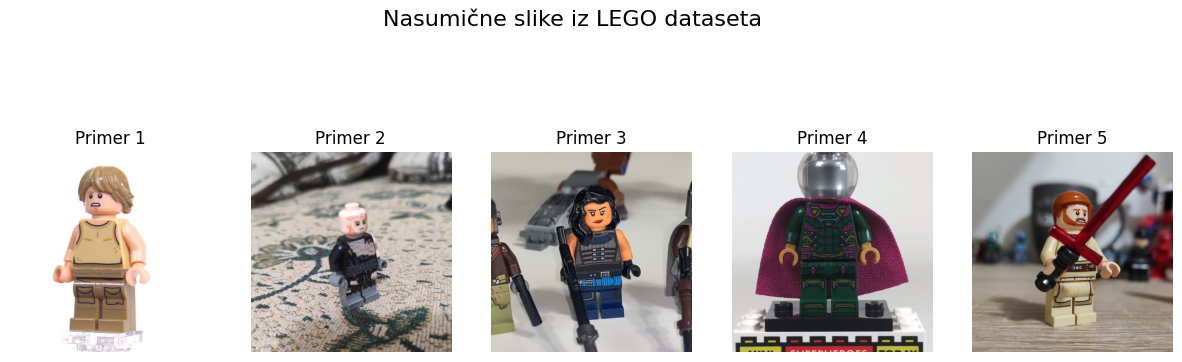

In [10]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_paths = []
for root, dirs, files in os.walk("data"):
    for file in files:
        if file.endswith(".jpg"):
            image_paths.append(os.path.join(root, file))

plt.figure(figsize=(15, 5))
for i in range(5):
    img_path = random.choice(image_paths)
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Primer {i+1}")
plt.suptitle("Nasumične slike iz LEGO dataseta", fontsize=16)

##Priprema slika za GAN model

Pre nego što započnemo sa treniranjem GAN modela, neophodno je pripremiti slike u odgovarajućem formatu. GAN modeli, poput DCGAN-a koji ćemo koristiti, zahtevaju da sve ulazne slike budu istih dimenzija i da su vrednosti piksela normalizovane.

U ovom koraku, potrebno je pomoću `torchvision.transforms` definisati niz transformacija koje se primenjuju na slike:

**Resize** – skalira sve slike na 64x64 piksela,


**ToTensor** – pretvara slike u tenzore koje model može da obradi. Tenzori su  višedimenzionalni nizovi brojeva. U kontekstu GAN-a tenzori su standardni način da model „vidi“ podatke, jer svi ulazi i izlazi moraju biti u numeričkom obliku.


**Normalize** – normalizuje vrednosti piksela na opseg između -1 i 1, što je standard za treniranje GAN-a.


Zatim, pomoću **ImageFolder** klase učitava se ceo dataset iz lokalnog foldera data. Ova obrada podataka omogućava da slike budu u formatu koji GAN može odmah da koristi za treniranje.


In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = datasets.ImageFolder("data", transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

##Kreiranje GAN arhitekture – DCGAN

GAN model se sastoji iz dve mreže koje se treniraju zajedno:

Generator (G) – pokušava da napravi lažne slike koje izgledaju kao prave.
Discriminator (D) – pokušava da razlikuje prave slike od lažnih.
Oni funkcionišu kao protivnici:

Generator želi da prevari Discriminator.
Discriminator želi da otkrije prevare.
Zato se zove “Generative Adversarial Network” (Adversarial = suparnički).


Arhitektura koju ćemo koristiti:

###DCGAN (Deep Convolutional GAN)
DCGAN koristi konvolucione slojeve, koji su odlični za obradu slika.
Sada ćemo definisati prvo Generator, pa Discriminator.

####Generator

In [12]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, z_dim=100, img_channels=3, feature_g=64):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(

            nn.ConvTranspose2d(z_dim, feature_g * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(feature_g * 8),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 8, feature_g * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 4, feature_g * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 2, feature_g, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g, img_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.gen(input)

U ovom delu napravljen je **Generator** –  zadužen za kreiranje novih, realističnih slika na osnovu nasumičnih ulaza.

Ulaz u ovaj model je vektor dimenzije 100 –  koji sadrži slučajne vrednosti (tzv. latentni prostor).   

Model koristi više slojeva koji postepeno povećavaju veličinu slike, dok se ne dobije slika dimenzija 64x64 piksela sa 3 kanala (RGB). Na kraju koristim Tanh funkciju kako bi se vrednosti slike prilagodile u opsegu koji model može da razume (od -1 do 1).

Generator služi da, na osnovu nasumičnog ulaza, nauči da generiše slike koje vizuelno podsećaju na one iz originalnog skupa podataka.

###Diskriminator

Discriminator (diskriminator) je komponenta GAN arhitekture koja ima zadatak da proceni da li je neka slika „prava“ (iz dataseta) ili „lažna“ (generisana od strane Generatora). Njegova uloga je da pomogne Generatoru da kroz iteracije pravi sve realističnije slike.

In [13]:
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, img_channels=3, feature_d=64):

        super(Discriminator, self).__init__()

        self.disc = nn.Sequential( #redom izvršavaj sledeće:
            nn.Conv2d(img_channels, feature_d, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d, feature_d * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d * 2, feature_d * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d * 4, feature_d * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.disc(input)





Mreža je sastavljena od više konvolucionih slojeva (Conv2d) koji analiziraju slike u slojevima, kao da prolaze kroz filtere koji izvlače važne vizuelne karakteristike (ivice, oblike, boje…). Svaki sledeći sloj uči sve složenije detalje slike.

Nakon svakog konvolucionog sloja primenjuje se LeakyReLU aktivaciona funkcija. Za razliku od običnog ReLU-a, koji preseče sve negativne vrednosti na nulu, LeakyReLU propušta mali deo negativnih vrednosti (npr. -0.5 → -0.1). Ovo omogućava mreži da i u negativnim opsezima uči, što smanjuje rizik da neki neuroni „prestanu da rade“.

Zatim ide BatchNorm2d, koji normalizuje izlaze iz slojeva, znači poravna vrednosti kako bi trening bio stabilniji i brži. Ovo takođe pomaže da svi neuroni uče ravnomerno.

Poslednji sloj mreže koristi Sigmoid funkciju koja daje broj između 0 i 1, što predstavlja verovatnoću da je slika autentična. Recimo ako je vrednost blizu 1, mreža misli da je slika prava. Ako je blizu 0, onda smatra da je generisana.

In [14]:
#def forward(self, input):
#        return self.disc(input)

forward metoda definiše kako Diskriminator obrađuje ulazne slike. Kada mu se slika prosledi, ona se redom šalje kroz sve slojeve koje smo prethodno definisali. Na kraju, mreža vraća verovatnoću (između 0 i 1) da je slika “prava” (tj. da nije generisana).

##Inicijalizacija modela i optimizatora

Nakon definisanja arhitekture Generatora i Discriminatora, sledeći korak podrazumeva njihovu inicijalizaciju, kao i pripremu svih elemenata potrebnih za treniranje modela.

Pre početka treniranja, postavljaju se osnovne vrednosti koje određuju ponašanje modela. Definiše se uređaj na kojem će se model izvršavati — ukoliko je dostupan GPU (grafička kartica), koristi se za bržu obradu, u suprotnom se koristi CPU. Zatim se postavljaju ključni hiperparametri, kao što su learning rate i dimenzija latentnog vektora z_dim, koji predstavlja nasumični unos za generator iz kojeg se kreiraju slike.

Modeli Generatora i Diskriminatora se inicijalizuju i premeštaju na odabrani uređaj. Definiše se i funkcija greške (Binary Cross Entropy Loss), koja se koristi za procenu tačnosti modela, tj. koliko uspešno Diskriminator razlikuje stvarne od generisanih slika.



In [15]:
import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr = 0.0002
z_dim = 100

gen = Generator(z_dim).to(device)
disc = Discriminator().to(device)

criterion = nn.BCELoss()


Na kraju, biraju se Adam optimizatori za oba modela, koji služe za optimizaciju težina tokom procesa učenja. Ovi optimizatori omogućavaju efikasnije i stabilnije treniranje GAN modela.

In [16]:
opt_gen = optim.Adam(gen.parameters(), lr=lr, betas=(0.5, 0.999))
opt_disc = optim.Adam(disc.parameters(), lr=lr, betas=(0.5, 0.999))

Ova faza pripreme omogućava stabilno i efikasno treniranje GAN modela uz jasno definisane uslove i parametre rada.

##Treniranje GAN modela

Treniranje GAN modela sastoji se od dve glavne faze koje se u svakom koraku smenjuju – treniranje Discriminatora i treniranje Generatora. Proces se odvija u petlji kroz unapred definisani broj epoha (u ovom slučaju 500), što znači da se više puta prolazi kroz ceo skup podataka.

U svakom koraku:

Generišu se lažne slike – Generator prima slučajan ulaz (latentni vektor) i na osnovu njega pokušava da napravi novu sliku.
Discriminator se trenira tako što procenjuje:
koliko dobro prepoznaje prave slike iz skupa podataka,
koliko uspešno detektuje da su slike koje je napravio Generator lažne.
Na osnovu toga se računa gubitak (loss) i unapređuju se težine Discriminatora.
Generator se zatim trenira sa ciljem da „prevari“ Discriminator – tj. da generiše slike koje će Discriminator oceniti kao prave. Zato se i koristi gubitak koji meri koliko su izlazi Generatora „uverljivi“.
Kroz svaki ciklus Generator i Discriminator uče jedan od drugog – Generator postaje sve bolji u kreiranju realističnih slika, dok Discriminator uči da ih sve teže razlikuje.

Na kraju svake epohe prikazuju se vrednosti gubitka za oba modela (Loss D, Loss G), što omogućava praćenje procesa učenja. Kada Generatorov gubitak postaje manji, to znači da sve bolje imitira slike iz originalnog skupa podataka.

In [17]:
import torch


epochs = 400

for epoch in range(epochs):
    for batch_idx, (real, _) in enumerate(dataloader):
        real = real.to(device)
        batch_size = real.size(0)


        noise = torch.randn(batch_size, z_dim, 1, 1).to(device)
        fake = gen(noise)


        disc_real = disc(real).view(-1)
        loss_real = criterion(disc_real, torch.ones_like(disc_real))

        disc_fake = disc(fake.detach()).view(-1)
        loss_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

        loss_disc = (loss_real + loss_fake) / 2
        disc.zero_grad()
        loss_disc.backward()
        opt_disc.step()


        output = disc(fake).view(-1)
        loss_gen = criterion(output, torch.ones_like(output))

        gen.zero_grad()
        loss_gen.backward()
        opt_gen.step()

    print(f"Epoch [{epoch+1}/{epochs}]  Loss D: {loss_disc:.4f}, Loss G: {loss_gen:.4f}")

Epoch [1/400]  Loss D: 0.1221, Loss G: 6.1069
Epoch [2/400]  Loss D: 0.0761, Loss G: 7.9500
Epoch [3/400]  Loss D: 0.0519, Loss G: 7.0585
Epoch [4/400]  Loss D: 0.0156, Loss G: 6.7636
Epoch [5/400]  Loss D: 0.7615, Loss G: 16.8654
Epoch [6/400]  Loss D: 0.0279, Loss G: 6.4831
Epoch [7/400]  Loss D: 0.0111, Loss G: 9.9891
Epoch [8/400]  Loss D: 0.0083, Loss G: 8.3116
Epoch [9/400]  Loss D: 0.1681, Loss G: 12.4860
Epoch [10/400]  Loss D: 0.0644, Loss G: 4.7080
Epoch [11/400]  Loss D: 0.2312, Loss G: 6.3885
Epoch [12/400]  Loss D: 0.2156, Loss G: 4.1282
Epoch [13/400]  Loss D: 0.3303, Loss G: 3.1700
Epoch [14/400]  Loss D: 0.4300, Loss G: 3.0156
Epoch [15/400]  Loss D: 0.6366, Loss G: 3.1225
Epoch [16/400]  Loss D: 0.5189, Loss G: 3.9652
Epoch [17/400]  Loss D: 0.3665, Loss G: 2.7320
Epoch [18/400]  Loss D: 0.3618, Loss G: 1.8096
Epoch [19/400]  Loss D: 0.2907, Loss G: 2.6333
Epoch [20/400]  Loss D: 0.5217, Loss G: 2.3796
Epoch [21/400]  Loss D: 0.2529, Loss G: 2.9173
Epoch [22/400]  Loss

U fazi treniranja GAN modela, koristi se petlja koja prolazi kroz više epoha i u ovom slučaju, 400 puta. Svaka epoha predstavlja jedan  prolazak kroz ceo skup podataka. U okviru svake epohe, podaci se uzimaju u manjim grupama koje nazivamo batch. Prave slike iz tih batch-eva se prebacuju na uređaj za obradu, a zatim se beleži koliko ih ima.

Zatim se generiše latentni vektor. To je nasumični šum koji se koristi kao ulaz za Generator. Generator na osnovu tog šuma pokušava da napravi novu (lažnu) sliku koja bi trebala da izgleda kao prava.

Sledeći korak je treniranje Diskriminatora, koji treba da nauči da razlikuje prave slike od lažnih. Prvo mu pokazujemo prave slike i očekujemo da ih prepozna kao “prave” (što znači da bi trebalo da im dodeli vrednost blizu 1). Nakon toga, pokazujemo mu lažne slike koje je napravio Generator i očekujemo da ih prepozna kao “lažne” (tj. da im dodeli vrednost blizu 0). Računamo prosečnu grešku Diskriminatora na osnovu oba primera i pomoću nje ažuriramo njegove parametre, kako bi u sledećem prolazu bio još tačniji.

Zatim treniramo Generator. On pokušava da prevari Diskriminator tako što pravi slike koje izgledaju dovoljno uverljivo da Diskriminator pomisli da su prave. Zato, kada ocenjujemo njegovu grešku, cilj nam je da Diskriminator za njegove slike daje vrednosti blizu 1. Na osnovu te greške, Generator se takođe uči i poboljšava.

Na kraju svake epohe, prikazuje se trenutna vrednost greške za oba modela, Diskriminator i Generator, kako bismo mogli da pratimo njihov napredak i balans. Cilj je da Generator postaje sve bolji u pravljenju slika, a Diskriminator sve bolji u razlikovanju pravih od lažnih, dok ne dostignu ravnotežu.

Zbog ograničenog broja slika u datasetu (ukupno 494), bilo je potrebno pažljivo pristupiti procesu treniranja kako bi se iz modela izvukao maksimum. Tokom rada, eksperimentisano je sa različitim brojem epoha: model je prvo treniran 10 i 100 epoha kako bi se uočio pravac kretanja gubitka i kvaliteta generisanih slika. U cilju brže obuke, treniranje je prebačeno na GPU, što je omogućilo da se brže izvršava sa više epoha, pa je prebačeno treniranje na 200 i 500 epoha.

Analizom rezultata nakon svakog puta, primećeno je da se najstabilniji i najrealniji izlazi pojavljuju nakon otprilike 400 epoha. Na osnovu toga, odlučeno je da se zadrži broj epoha na toj vrednosti.

##Evaluacija rezultata treniranja


Na početku treniranja, Generator (G) i Discriminator (D) počinju bez ikakvog znanja — G pokušava da generiše slike "nasumično", dok D uči da prepozna koje su slike prave, a koje lažne.


Tokom epoha, posmatrali smo dve vrednosti:


Loss D — gubitak (greška) Discriminatora


Loss G — gubitak Generatora


U prvim epohama, Discriminator je bio prilično dobar u razlikovanju pravih i lažnih slika, pa je njegov gubitak (Loss D) bio nizak, a Generator je imao visok gubitak (Loss G) jer su njegove slike bile loše i D ih je lako "prozreo".


Kako je treniranje napredovalo:



Loss D se postepeno smanjivao i stabilizovao (npr. od 0.07 do 0.001)
Loss G se u početku smanjivao, pa oscilovao (od ~20 pa se stabilizovao oko 6–7)
To pokazuje da je Discriminator postajao veoma dobar, pa je Generator morao da se više potrudi. Međutim, i pored toga, slike koje je Generator pravio su ostajale mutne i neprepoznatljive.



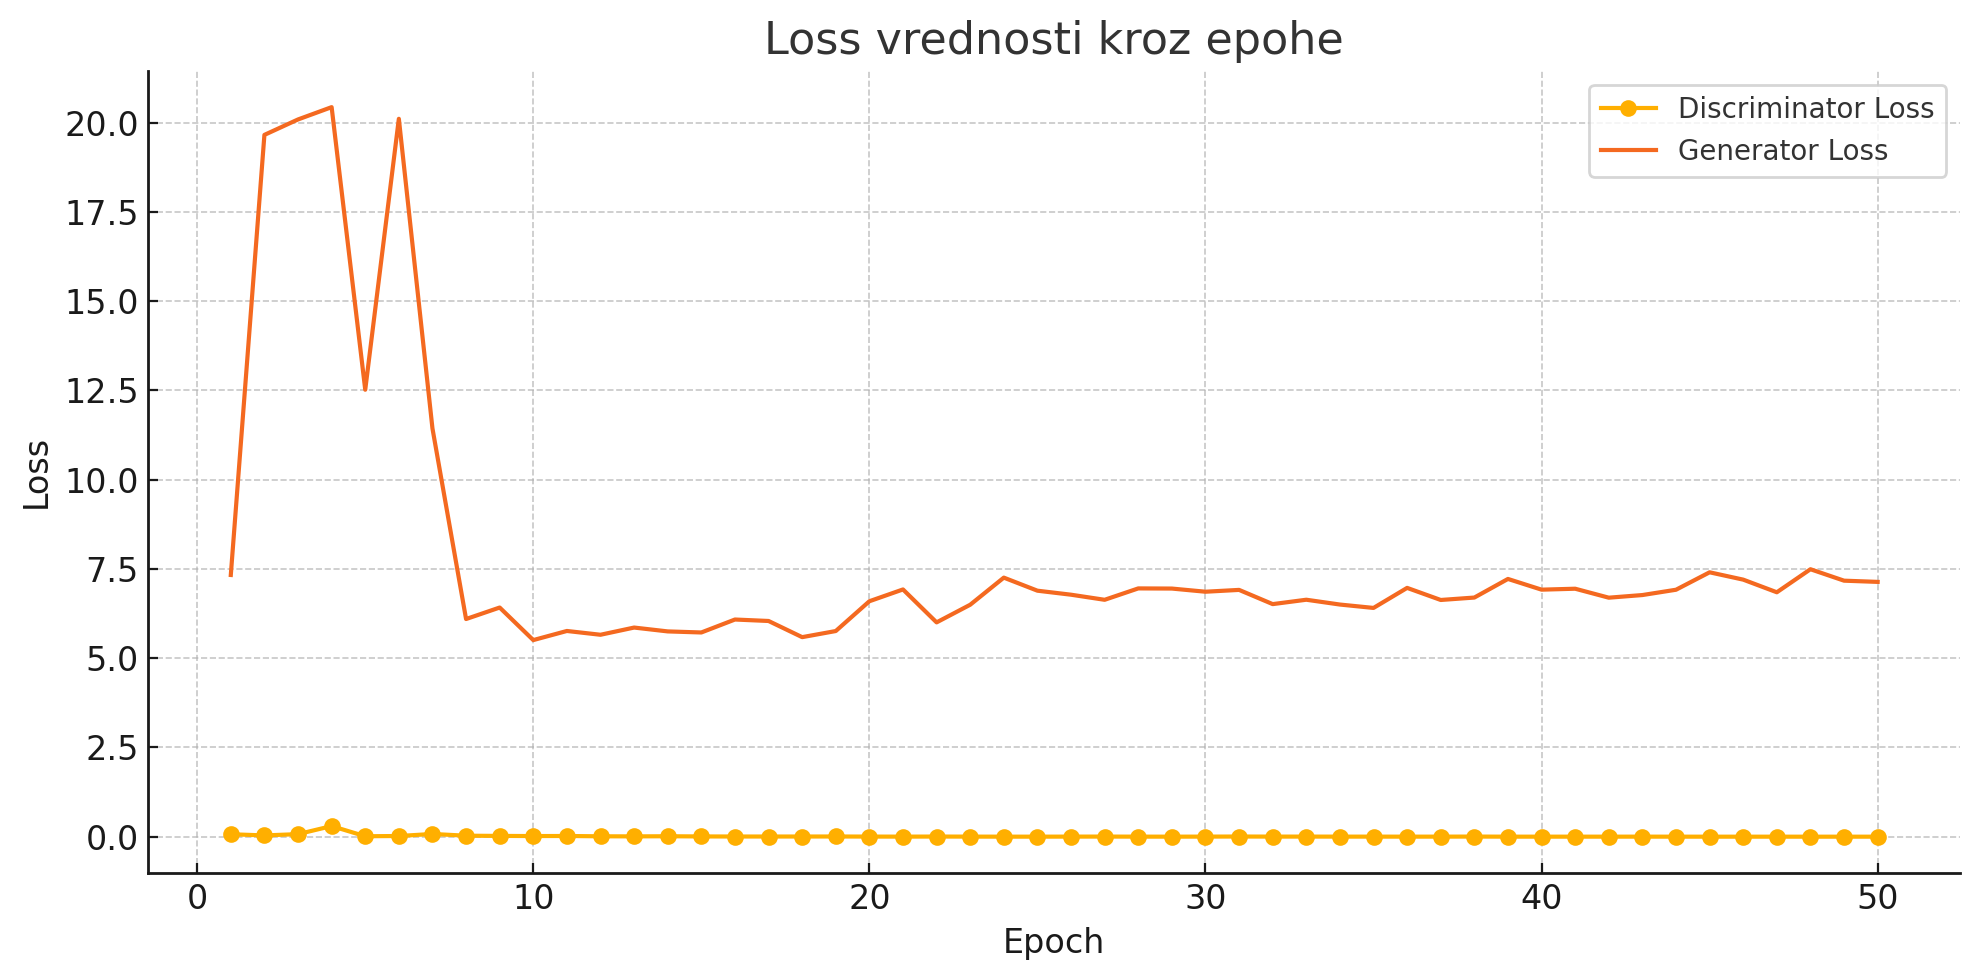

###*Grafikon koji prikazuje vrednosti gubitaka (loss) za Generator i Discriminator kroz 50 epoha.*

##Generisanje i prikaz slika

Za vizualizaciju rezultata obučavanja GAN modela koristi se funkcija show_generated_images, čija je svrha da generiše određeni broj novih slika pomoću Generatora i prikaže ih u formi mreže.


U cilju uspešne implementacije GAN modela i vizualizacije rezultata, uvedene su sledeće biblioteke koje omogućavaju rad sa tenzorima, neuronskim mrežama i prikaz generisanih slika:

`torch` – koristi se za rad sa modelima, tenzorima i generisanjem nasumičnog ulaza za Generator.


**`matplotlib.pyplot`** – služi za crtanje i prikaz slika koje je model generisao.


`numpy` – koristi se za matematičke operacije nad podacima, kao što su transformacije i priprema slika za prikaz.

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def show_generated_images(generator, num_images=16):
    generator.eval()
    noise = torch.randn(num_images, z_dim, 1, 1).to(device)
    with torch.no_grad():
        fake_images = generator(noise).detach().cpu()

    grid_size = int(np.sqrt(num_images))
    fig, axs = plt.subplots(grid_size, grid_size, figsize=(6,6))
    idx = 0
    for i in range(grid_size):
        for j in range(grid_size):
            img = fake_images[idx]
            img = img * 0.5 + 0.5
            axs[i, j].imshow(np.transpose(img.numpy(), (1, 2, 0)))
            axs[i, j].axis('off')
            idx += 1
    plt.tight_layout()
    plt.show()


Na početku funkcije, Generator se postavlja u tzv. eval mod, kako bi se isključili svi elementi koji se koriste samo tokom treniranja (poput normalizacije). Potom se nasumično generišu latentni vektori koji predstavljaju "šum" – tj. ulaz u Generator. Na osnovu tog ulaza Generator pravi slike koje pokušavaju da izgledaju kao da su iz stvarnog seta podataka.

Slike se zatim skaliraju iz opsega [-1, 1] u [0, 1] kako bi se pravilno prikazale. Sve slike se organizuju u kvadratnu mrežu (npr. 4x4 ako je 16 slika) i prikazuju se pomoću biblioteke matplotlib.

Ova funkcija je važna jer omogućava jednostavan i brz pregled toga šta je model naučio i koliko su rezultati vizuelno uverljivi.

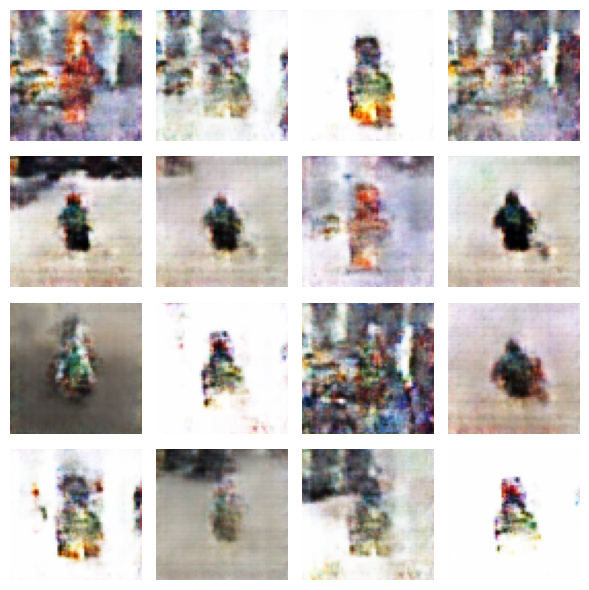

In [19]:

show_generated_images(gen)

Pozivamo funkciju i dobijamo sledeće slike:

####Proverava broja slika u datasetu

In [20]:
import os

def count_images(root_dir):
    count = 0
    for root, dirs, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(('.png', '.jpg', '.jpeg')):
                count += 1
    return count

print("Ukupan broj slika u datasetu:", count_images("data"))


Ukupan broj slika u datasetu: 494


###Zaključak o generisanim slikama

Na osnovu generisanih slika možemo zaključiti da model jeste naučio određene osnovne karakteristike LEGO figura, kao što su silueta, položaj i raspored boja. Međutim, rezultujuće slike su i dalje niske kvalitete — prepoznaju se kao figure, ali su mutne, bez jasnih kontura, sa šumom i neprirodnim bojama.


Glavni razlozi za to su:


-Mali broj slika u datasetu (494), što je ograničavajuće za treniranje GAN modela.


-Nizak kvalitet samih slika u datasetu, koje su često mutne, sa lošim osvetljenjem i vizuelnim šumom, što otežava modelu učenje jasnih i stabilnih obrazaca.


-Vizuelna raznolikost unutar dataseta (više različitih figura i pozadina), što otežava konsolidaciju doslednih karakteristika.


Iako je rezolucija slika bila smanjena na 64×64 kako bi se olakšao trening i povećala stabilnost, količina i kvalitet podataka nisu bili dovoljni za postizanje realističnih rezultata.



Uprkos tome, model pokazuje potencijal — uz veći broj kvalitetnijih i konzistentnih slika, bolju pripremu podataka (npr. kropovanje, filtriranje, augmentacija) i duži trening, moguće je postići znatno bolje rezultate.

####**Razlika izmedju generisane fotografije i fotografije iz dataset-a:**


####Generisana fotografija:

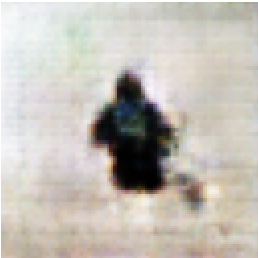

####Fotografija iz dataset-a:

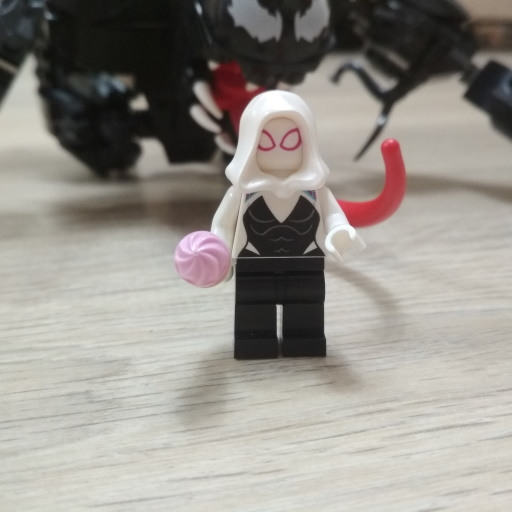

#**Zaključak**

U okviru ovog projekta uspešno je implementiran Generative Adversarial Network (GAN) model za generisanje slika LEGO minifigura. Projekat je obuhvatio sve ključne korake – od teorijskog razumevanja GAN arhitekture, preko pripreme i analize ulaznog dataset-a, pa do treniranja modela, vizuelizacije rezultata i evaluacije generisanih slika.


GAN modeli su poznati po svojoj složenosti i osetljivosti na kvalitet i količinu podataka. Tokom ovog rada, korišćen je unapred pripremljen dataset LEGO minifigura u rezoluciji 64x64 piksela, koji je sadržao ograničen broj primera. Uprkos uspešnoj obuci modela, jasno je da su ograničenja kvaliteta i raznovrsnosti ulaznih podataka uticala na krajnje rezultate – generisane slike ne postižu željeni nivo realizma i jasnoće. Takođe, niska rezolucija dodatno otežava očuvanje detalja na slici, što je ključni izazov za GAN modele u domenu generisanja lica ili prepoznatljivih objekata.


###U okviru praktične implementacije, detaljno su prikazani:


*1.Teorijski pregled GAN arhitekture i princip rada između generatora i diskriminatora,*


*2.Opis i priprema dataset-a,*


*3.Implementacija modela u PyTorch biblioteci,*


*4.Praćenje vrednosti funkcija gubitka (loss) kroz epohe treniranja,*


*5.Vizuelna analiza i poređenje realnih i generisanih slika.*




**Kao dodatna vrednost**, prikazani su grafički prikazi toka treniranja, kao i funkcije za uporednu vizuelizaciju slika koje omogućavaju kvalitetniju evaluaciju u budućim iteracijama. Tokom rada je testirano više konfiguracija i zaključili smo da najbolje funkcioniše na 400 epoha.



Ovaj projekat jasno ukazuje da za postizanje uverljivijih rezultata u radu sa GAN arhitekturom, od izuzetne važnosti postaju sledeći faktori:



`-veći i raznovrsniji dataset,
-slike veće rezolucije i bolje kvalitativne strukture,
-duže treniranje uz naprednije tehnike stabilizacije GAN modela.`


Iako krajnji rezultati ne dostižu potpuno realističan vizuelni prikaz, ovaj rad je postavio dobru osnovu za dalje eksperimentisanje sa dubokim generativnim modelima i ukazao na konkretne pravce za unapređenje u budućim verzijama projekta.

#Literatura


1. GeeksForGeeks - Generative Adversarial Networks (GANs) in PyTorch - https://www.geeksforgeeks.org/deep-learning/generative-adversarial-networks-gans-in-pytorch/



2. Wikipedia https://en.wikipedia.org/wiki/Generative_adversarial_network


3. PyTorch — PyTorch documentation. Preuzeto sa: https://pytorch.org/docs/stable/nn.html


4. PyTorch - DCGAN Tutorial https://docs.pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

5. Ian J. Goodfellow, Generative Adversarial Networks - https://papers.nips.cc/paper_files/paper/2014/file/5ca3e9b122f61f8f06494c97b1afccf3-Paper.pdf